In [9]:
from sklearn.model_selection import cross_val_score
clf = GaussianNB()
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.32 (+/- 0.08)


In [91]:
import pandas as pd
import numpy as np
import category_encoders as ce
training_df = pd.read_csv('training_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')
print("Training:" , training_df.shape)
print("Test:", test_df.shape)

Training: (300880, 17)
Test: (75221, 17)


In [92]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
training_df["FIRE_SIZE_CLASS"] = lb_make.fit_transform(training_df["FIRE_SIZE_CLASS"]) # because it is ordinal
#training_df["STAT_CAUSE_DESCR"] = lb_make.fit_transform(df["STAT_CAUSE_DESCR"]) # because it is ordinal
training_df['DISCOVERY_DATE'] = pd.to_datetime(training_df['DISCOVERY_DATE'])
training_df['CONT_DATE'] = pd.to_datetime(training_df['CONT_DATE'])
training_df['DISCOVERY_DATE']=training_df.DISCOVERY_DATE.apply(lambda x: x.strftime('%Y%m%d')).astype(int)
training_df['CONT_DATE'] = training_df.CONT_DATE.apply(lambda x: x.strftime('%Y%m%d')).astype(int)

In [93]:
test_df["FIRE_SIZE_CLASS"] = lb_make.fit_transform(test_df["FIRE_SIZE_CLASS"]) # because it is ordinal
#training_df["STAT_CAUSE_DESCR"] = lb_make.fit_transform(df["STAT_CAUSE_DESCR"]) # because it is ordinal
test_df['DISCOVERY_DATE'] = pd.to_datetime(test_df['DISCOVERY_DATE'])
test_df['CONT_DATE'] = pd.to_datetime(test_df['CONT_DATE'])
test_df['DISCOVERY_DATE']=test_df.DISCOVERY_DATE.apply(lambda x: x.strftime('%Y%m%d')).astype(int)
test_df['CONT_DATE'] = test_df.CONT_DATE.apply(lambda x: x.strftime('%Y%m%d')).astype(int)

In [94]:
X_train = training_df.drop(columns=['STAT_CAUSE_CODE','STAT_CAUSE_DESCR','OWNER_DESCR','FOD_ID','DISCOVERY_TIME',
                    'CONT_TIME','FIRE_SIZE_CLASS'])
#y = df['STAT_CAUSE_DESCR']
y_train = training_df['STAT_CAUSE_CODE']

In [95]:
X_test = test_df.drop(columns=['STAT_CAUSE_CODE','STAT_CAUSE_DESCR','OWNER_DESCR','FOD_ID','DISCOVERY_TIME',
                    'CONT_TIME','FIRE_SIZE_CLASS'])
#y = df['STAT_CAUSE_DESCR']
y_test = test_df['STAT_CAUSE_CODE']

In [96]:
features= ['NWCG_REPORTING_AGENCY','SOURCE_REPORTING_UNIT_NAME','STATE','COUNTY']
#features= ['STATE','COUNTY']
encoder_stat_county = ce.TargetEncoder(cols = features,drop_invariant=True, return_df=True)
X_train = encoder_stat_county.fit_transform(X_train,y_train)
X_test = encoder_stat_county.fit_transform(X_test,y_test)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled,columns=X_train.columns.tolist())
X_train

,NWCG_REPORTING_AGENCY,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,CONT_DATE,COUNTY
0,0.362761,-0.295667,-0.256530,-0.258119,-0.023809,-0.967023,0.777899,-0.488939,-0.258220,-1.030674
1,0.362761,0.020189,-0.556654,-0.562650,-0.029468,-0.996370,0.480318,0.068451,-0.562738,0.084155
2,0.362761,0.055695,-0.556654,-0.559483,-0.029106,-0.267877,1.032450,0.545573,-0.559571,-0.015160
3,0.362761,0.078908,0.943964,0.940901,-0.029428,1.506454,0.371275,-0.159719,0.940748,0.387394
4,0.362761,0.012827,-0.406592,-0.397276,-0.029187,-0.661421,0.929529,1.233818,-0.397371,1.249358
...,...,...,...,...,...,...,...,...,...,...
300875,-1.950098,-1.217919,0.343717,0.348452,-0.029468,1.843075,-1.544974,-0.566865,0.348325,-0.315747
300876,0.362761,-0.337110,1.094026,1.094119,-0.029106,-1.142442,-0.093586,-0.029654,1.093960,0.133768
300877,-1.950098,0.215510,-1.006839,-1.009954,-0.026699,-0.624038,0.950646,1.233818,-1.010008,1.279905
300878,0.105661,0.686226,0.943964,0.939760,-0.029307,1.807459,0.042330,0.048601,0.939608,0.739228


In [99]:
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled,columns=X_test.columns.tolist())

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
model = LogisticRegression(solver = 'liblinear', multi_class='ovr')
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [101]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = model.score(X_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 43798
Accuracy: 1.00


In [102]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 

0.36492468858430493


In [104]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

<function matplotlib.pyplot.show(*args, **kw)>

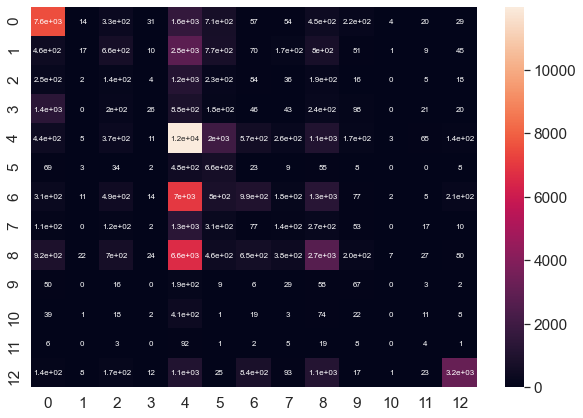

In [108]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
sn.set(font_scale=1.4) # for label size
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, annot_kws={"size": 8}) # font size
plt.show